In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
import os

import math

# Ajouter le chemin du dossier parent à sys.path
notebook_dir = os.path.abspath('..')  # Dossier parent de "notebook/"
sys.path.append(notebook_dir)

# Importer toutes les fonctions du module
from fonctions.importation import *
from fonctions.traitement_data import *
import warnings
warnings.filterwarnings("ignore")

c:\Users\theol\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = etl(r"C:\Users\theol\Desktop\Projet_MLOPS\data")

**************************************************
Démarrage du processus d'importation

Importation du fichier LondonHousePrice_1995.csv
Importation du fichier LondonHousePrice_1996.csv
Importation du fichier LondonHousePrice_1997.csv
Importation du fichier LondonHousePrice_1998.csv
Importation du fichier LondonHousePrice_1999.csv
Importation du fichier LondonHousePrice_2000.csv
Importation du fichier LondonHousePrice_2001.csv
Importation du fichier LondonHousePrice_2002.csv
Importation du fichier LondonHousePrice_2003.csv
Importation du fichier LondonHousePrice_2004.csv
Importation du fichier LondonHousePrice_2005.csv
Importation du fichier LondonHousePrice_2006.csv
Importation du fichier LondonHousePrice_2007.csv
Importation du fichier LondonHousePrice_2008.csv
Importation du fichier LondonHousePrice_2009.csv
Importation du fichier LondonHousePrice_2010.csv
Importation du fichier LondonHousePrice_2011.csv
Importation du fichier LondonHousePrice_2012.csv
Importation du fichier London

In [3]:
# Liste des colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Liste des colonnes non numériques
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

In [4]:
adapted_numeric_columns = ['bathrooms', 'bedrooms', 'floorAreaSqM',
       'livingRooms', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
       'rentEstimate_upperPrice', 'saleEstimate_lowerPrice',
       'saleEstimate_currentPrice', 'saleEstimate_upperPrice',
       'saleEstimate_valueChange.numericChange',
       'saleEstimate_valueChange.percentageChange', 'history_price',
       'history_percentageChange', 'history_numericChange']

adapted_non_numeric_columns = ['tenure','propertyType', 'currentEnergyRating', 'saleEstimate_confidenceLevel']

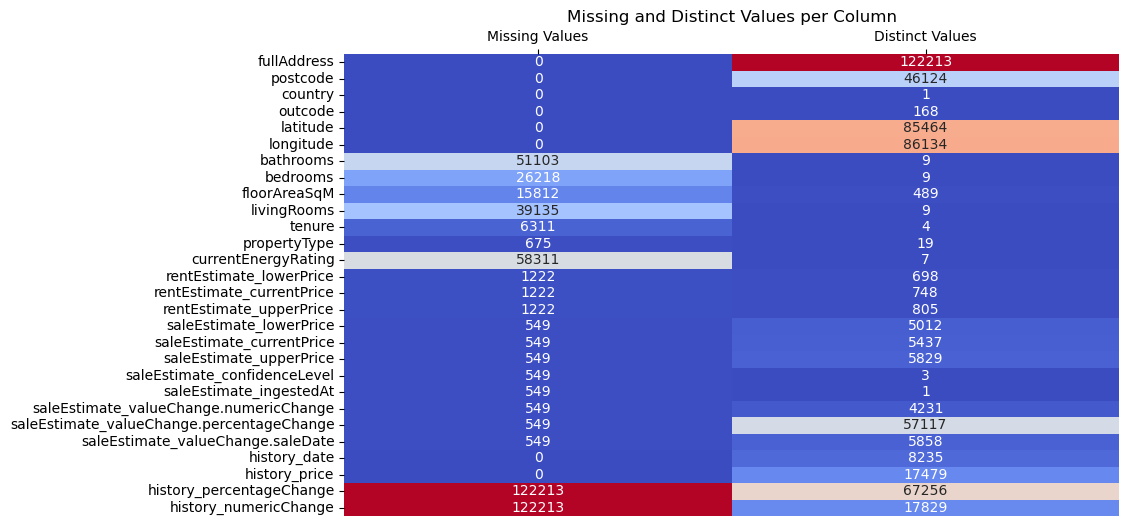

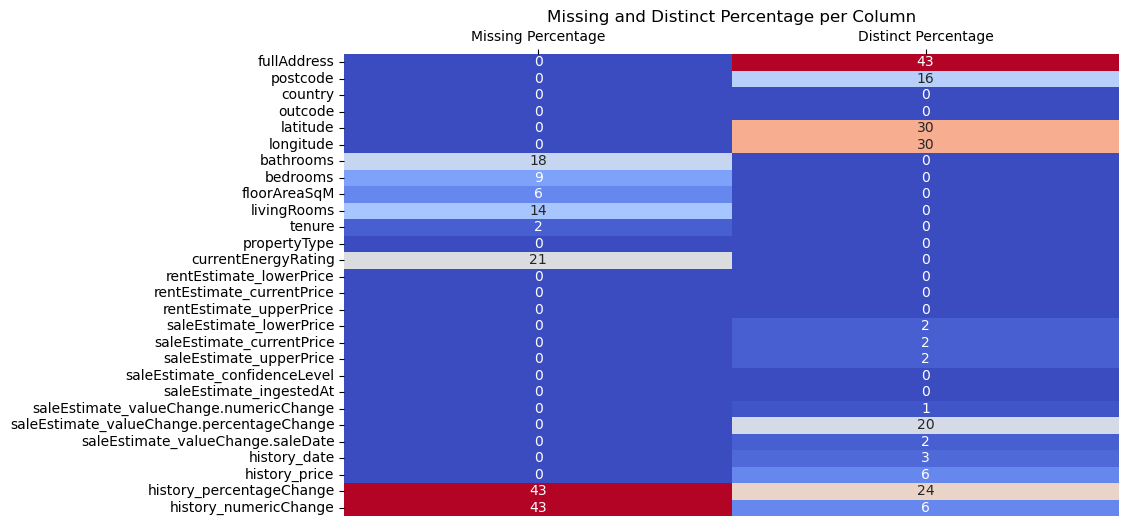

In [5]:
analyze_and_plot(df)

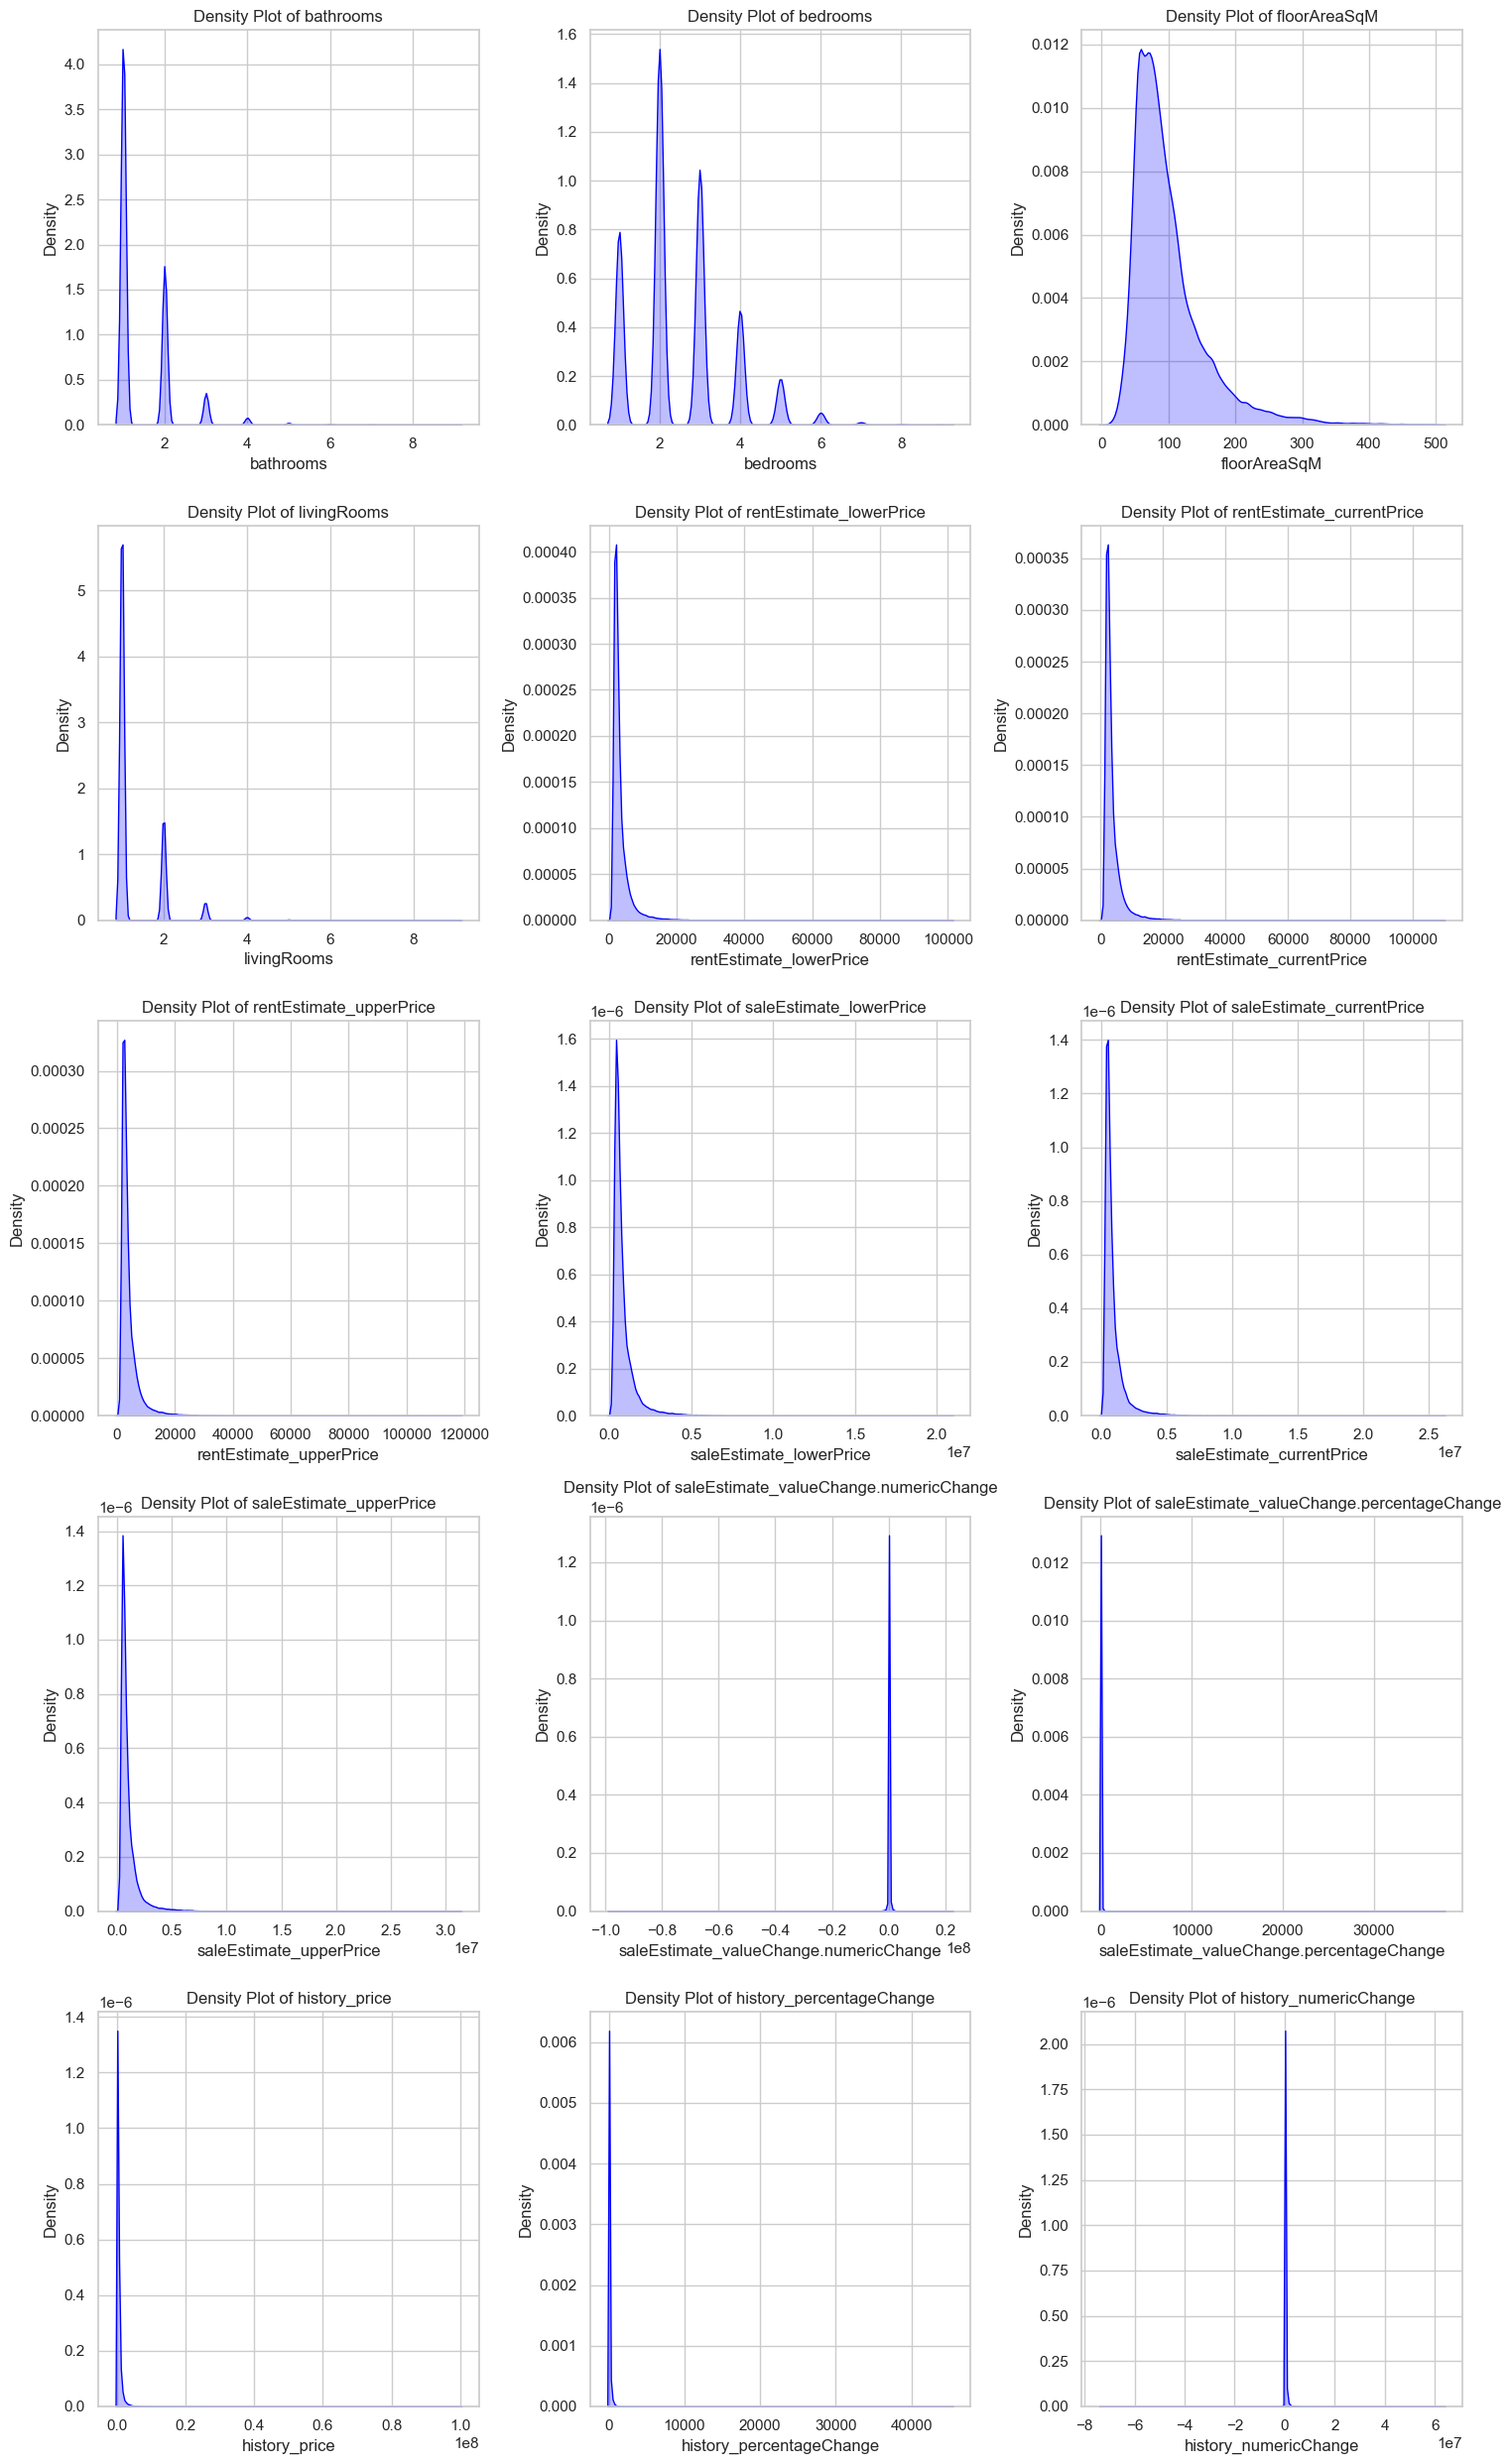

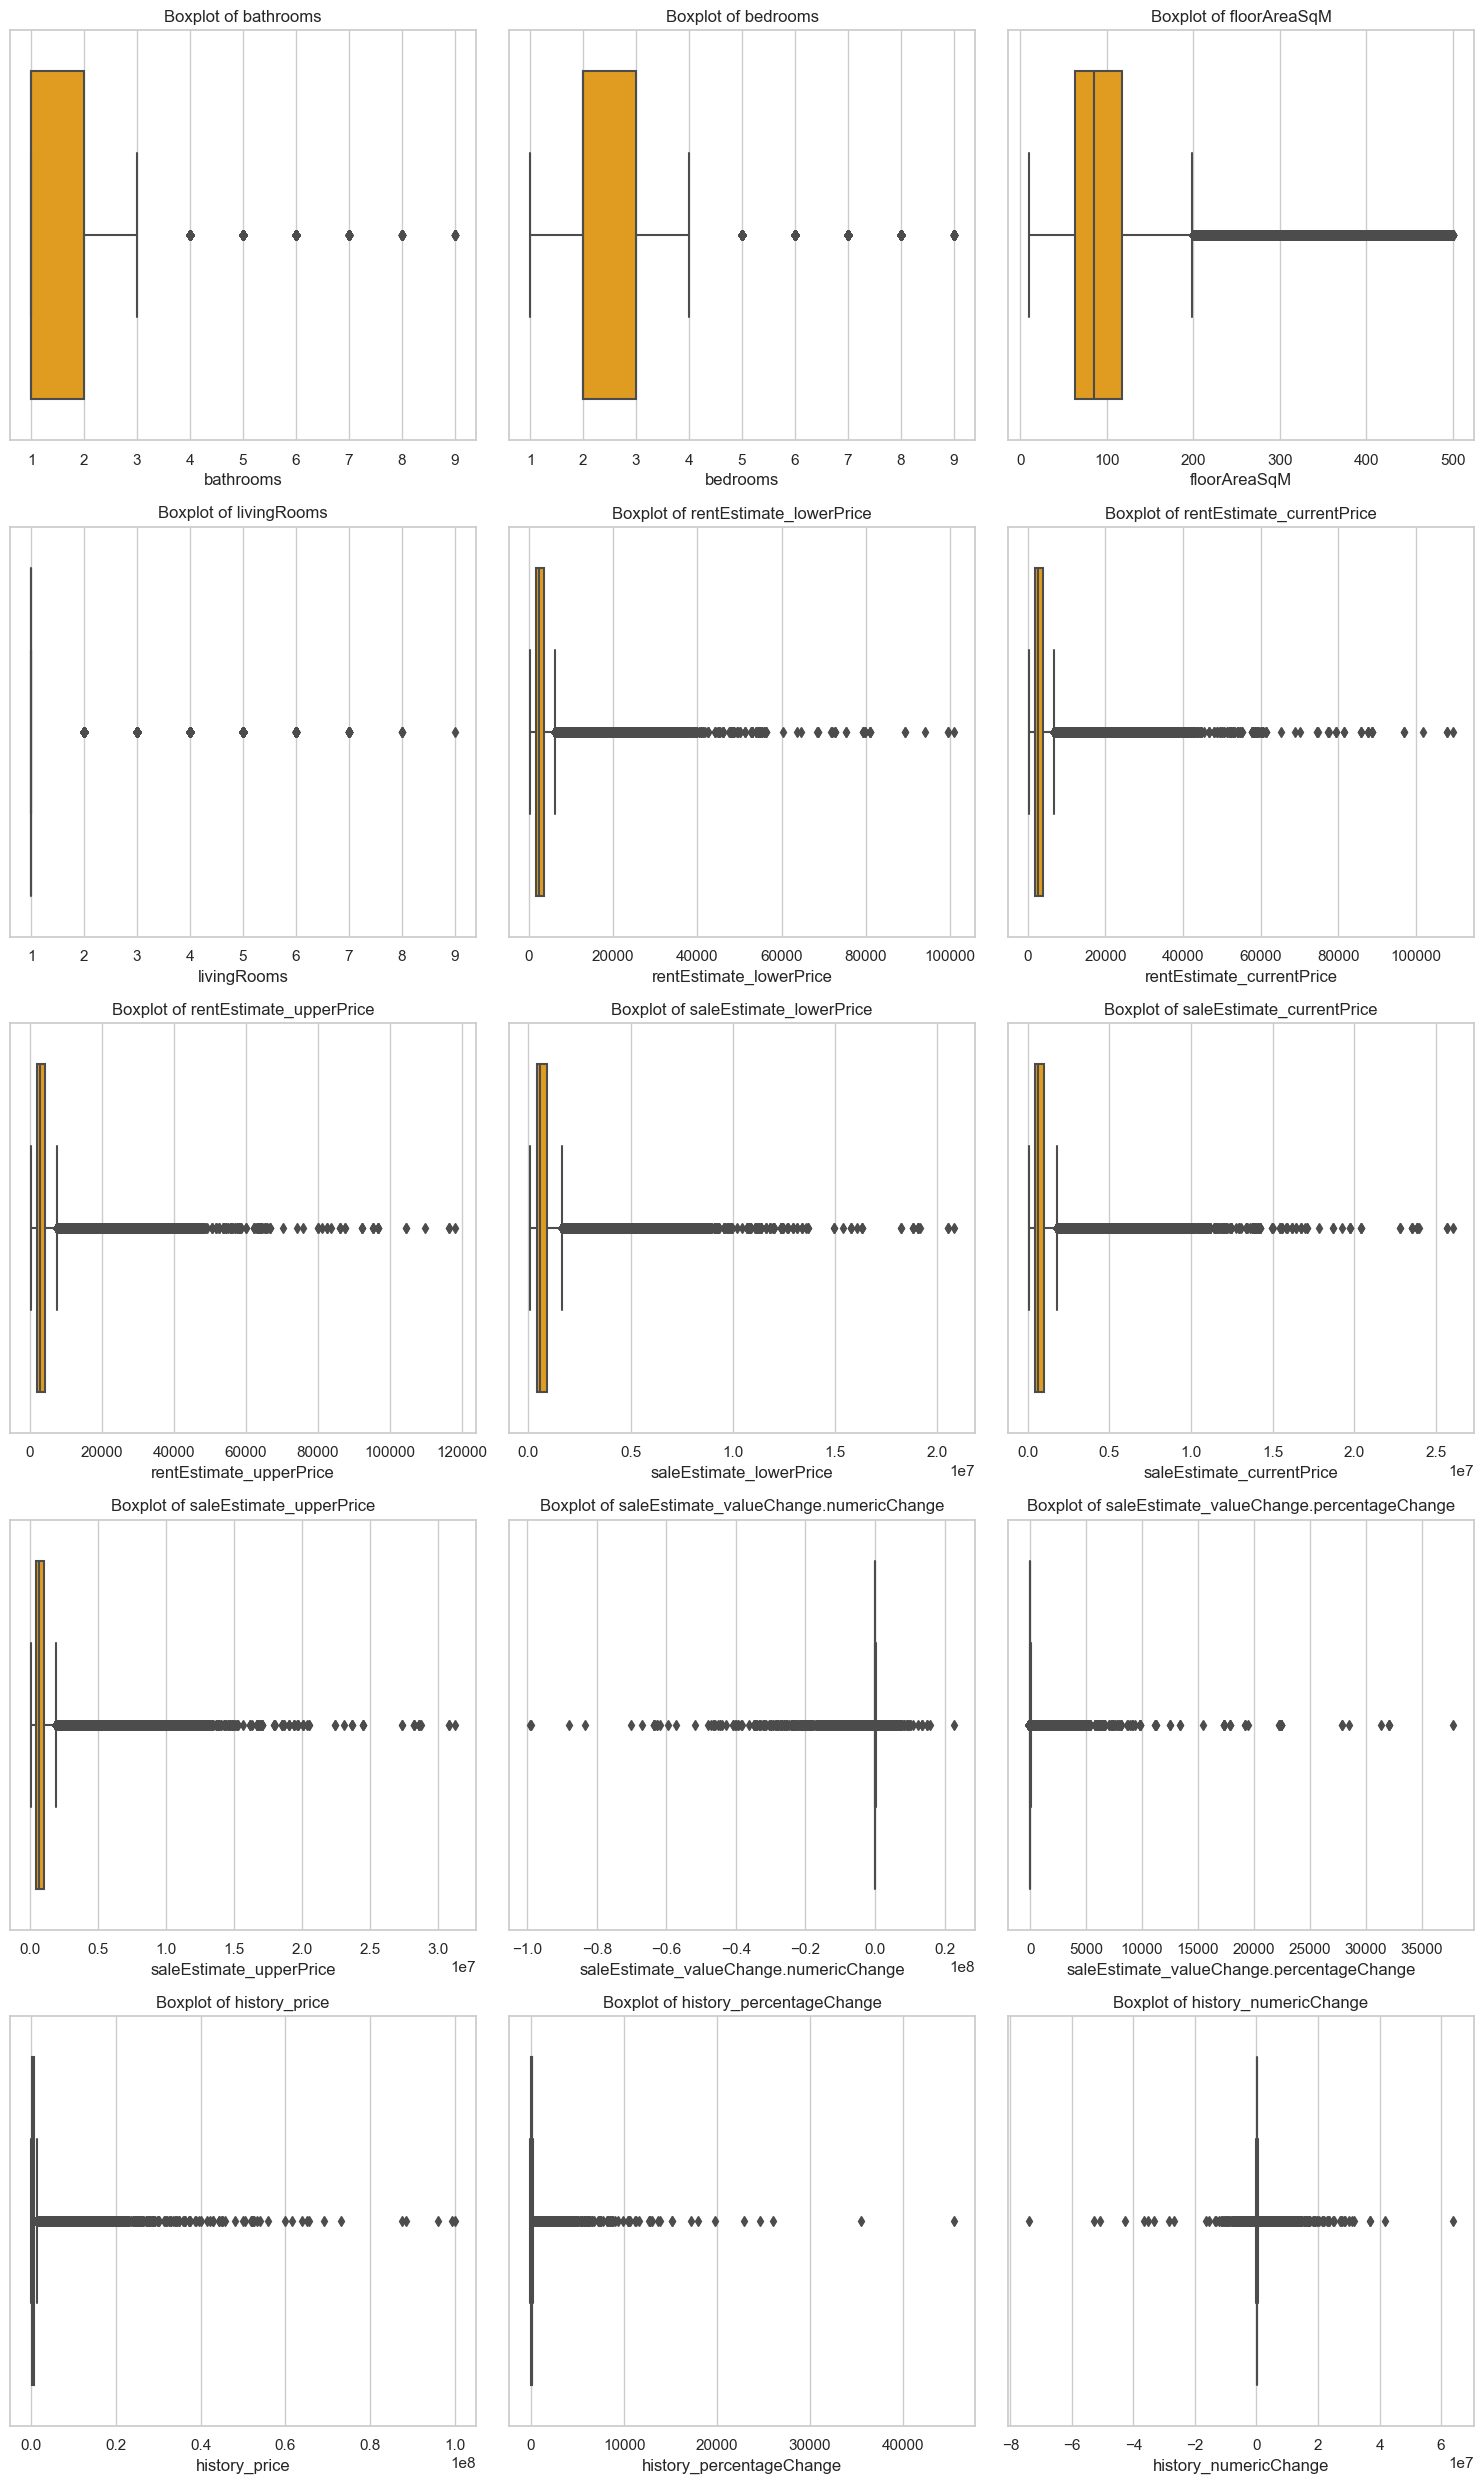

In [6]:
# Configuration de l'affichage
sns.set(style="whitegrid")
# Calcul du nombre de lignes et de colonnes pour le sous-graphique
num_cols = 3  # Par exemple, on fixe 3 colonnes
num_rows = math.ceil(len(adapted_numeric_columns) / num_cols)

plt.figure(figsize=(15, 5 * num_rows))

# Création de graphiques pour chaque colonne numérique avec courbe de densité
for i, column in enumerate(adapted_numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(df[column], fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Boîtes à moustaches pour les mêmes colonnes
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(adapted_numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


tenure
Leasehold    164927
Freehold     108739
Feudal         2135
Shared          760
Name: count, dtype: int64


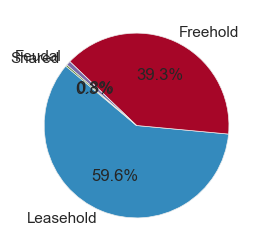

propertyType
Purpose Built Flat        72929
Flat/Maisonette           65023
Mid Terrace House         47881
Converted Flat            34058
Semi-Detached House       21881
Terrace Property          16551
End Terrace House         13924
Detached House             7201
Terraced                   1075
Semi-Detached Property      301
Bungalow Property           292
Semi-Detached Bungalow      255
Detached Bungalow           200
Detached Property           167
End Terrace Property        167
Mid Terrace Property        141
Mid Terrace Bungalow         69
Terraced Bungalow            44
End Terrace Bungalow         38
Name: count, dtype: int64


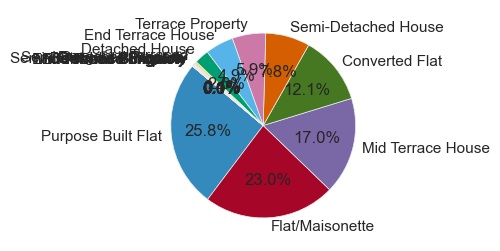

currentEnergyRating
D    93754
C    83952
B    22873
E    21627
F     1646
G      503
A      206
Name: count, dtype: int64


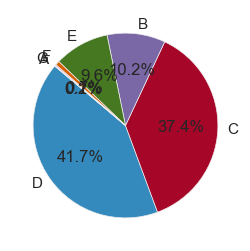

saleEstimate_confidenceLevel
HIGH      204349
MEDIUM     57515
LOW        20459
Name: count, dtype: int64


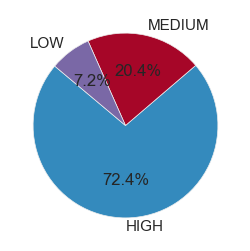

In [7]:
for column in adapted_non_numeric_columns :
    plt.style.use("bmh")
    prop_mod_cah = df[column].value_counts() # Calcul les proportions d'appartitions des modalités dans la variable
    print(prop_mod_cah)
    plt.figure(figsize=(3, 3))
    plt.pie(prop_mod_cah, labels=prop_mod_cah.index, autopct='%1.1f%%', startangle=140)
    plt.show()